Enter expiration date in YYYY-MM-DD format: 2023-10-20
Enter the stock ticker(s): EHC
Enter the option premium: .80
Enter the strike price: 70


<IPython.core.display.Javascript object>


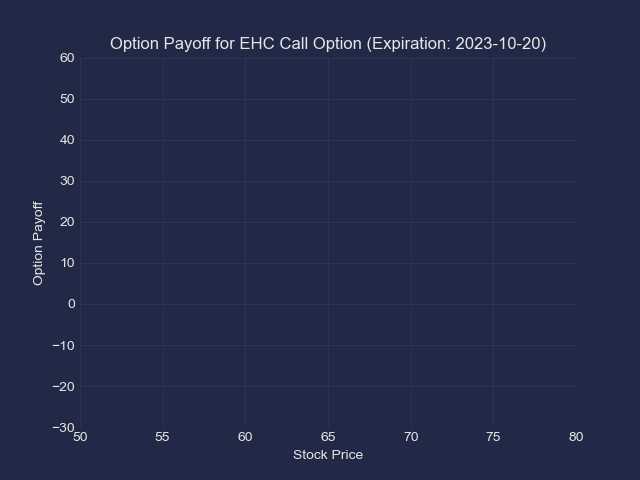

MovieWriter ffmpeg unavailable; using Pillow instead.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
import yfinance as yf
import mplcyberpunk
plt.style.use("cyberpunk")
# User-defined inputs
expiration_date = input("Enter expiration date in YYYY-MM-DD format: ")
stock_ticker = input("Enter the stock ticker(s): ")
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]
option_premium = float(input('Enter the option premium: '))
strike_price = 56
strike_price = float(input('Enter the strike price: '))

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
def option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([50, 80])
ax.set_ylim([-30, 60])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)


ani.save("EHC.png")
# Show the plot
plt.show()
